In [3]:
import matplotlib.pyplot as plt
import numpy as np
from functions import *
from gradient_descent import *

In [4]:
def plot_graphs(f, x_traj, y_traj, x_range=(-7.5, 7.5), y_range=(-5, 5)):
    """
    Function for plotting graphs
    :param f: function to plot
    :param x_traj: X-points of trajectory
    :param y_traj: Y-points of trajectory
    """
    fig = plt.figure("Gradient Descent")
    X, Y = np.linspace(*x_range, 40), np.linspace(*y_range, 40)
    X, Y = np.meshgrid(X, Y)
    Z = f([X, Y])

    ax_3d = fig.add_subplot(1, 2, 1, projection='3d')
    ax_3d.set_title("Function")
    ax_3d.plot_wireframe(X, Y, Z, color='magenta')

    x_traj = x_traj[:50]
    y_traj = y_traj[:50]

    z_opt = np.array([f([x_traj[i], y_traj[i]]) for i in range(len(x_traj))])
    ax_3d.scatter3D(x_traj, y_traj, z_opt, c='blue', marker='*', alpha=1, s=50)

    ax = fig.add_subplot(1, 2, 2)
    ax.set_title("Levels")
    ax.contour(X, Y, Z, len(y_traj) if len(y_traj) < 25 else 25)

    for i in range(len(x_traj) - 1):
        ax.arrow(x_traj[i, 0], y_traj[i, 0], x_traj[i + 1, 0] - x_traj[i, 0], y_traj[i + 1, 0] - y_traj[i, 0], head_width=0.1, head_length=0.1)

    ax.plot(x_traj, y_traj, '*', c='blue')
    plt.show()

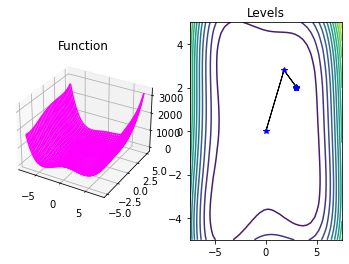

In [5]:
grad_x, grad_y, grad_iter, grad_time, grad_traj = gradient_descent_mult(f=himmelblau, grad=grad_himmelblau, X=[0, 0], selection_method=golden_section_search_mult)
X, Y = np.hsplit(grad_traj, 2)
plot_graphs(f=himmelblau, x_traj=X, y_traj=Y)

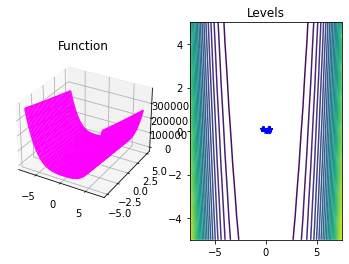

In [6]:
grad_x, grad_y, grad_iter, grad_time, grad_traj = gradient_descent_mult(f=rosenbrock, grad=grad_rosenbrock, X=[0, 0], selection_method=golden_section_search_mult)
X, Y = np.hsplit(grad_traj, 2)
plot_graphs(f=rosenbrock, x_traj=X, y_traj=Y)